In [29]:
%pip  install pandas numpy seaborn matplotlib
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     
sns.set(color_codes=True)

In [30]:
df = pd.read_csv("merged_data.csv")
# To display the top 5 rows 
df.head() 

C:\Users\pruth\AppData\Local\Temp\ipykernel_17656\3642269753.py:1: DtypeWarning: Columns (32,77,78,115) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("merged_data.csv")


,DISTRICTNAME,UNITNAME,Crime_No,Year_x,RI_accused,Noofvehicle_involved,Accident_Classification,Accident_Spot,Accident_Location,Accident_SubLocation,...,PermanentAddress_victim,PermanentCity_victim,PermanentState_victim,Nationality_Name_victim,DOB_victim,PersonType,InjuryType,Injury_Nature,Arr_ID_victim,Victim_ID
0,Bagalkot,Amengad PS,10470124520160143,2016,1,1,Road Accidents,Bridge,Villages settlement,Narrow bridge or culverts,...,",",Bagalkot,Karnataka,India,NaN,Injured,Minor,NaN,2016000837,2016000113
1,Bagalkot,Amengad PS,10470124520160143,2016,1,1,Road Accidents,Bridge,Villages settlement,Narrow bridge or culverts,...,",",Bagalkot,Karnataka,India,NaN,Injured,Minor,NaN,2016000839,2016000115
2,Bagalkot,Amengad PS,10470124520160143,2016,1,1,Road Accidents,Bridge,Villages settlement,Narrow bridge or culverts,...,",",Bagalkot,Karnataka,India,NaN,Injured,Minor,NaN,2016000840,2016000116
3,Bagalkot,Amengad PS,10470124520160143,2016,1,1,Road Accidents,Bridge,Villages settlement,Narrow bridge or culverts,...,",",Bagalkot,Karnataka,India,NaN,Injured,Grievous,NaN,2016000832,2016000108
4,Bagalkot,Amengad PS,10470124520160143,2016,1,1,Road Accidents,Bridge,Villages settlement,Narrow bridge or culverts,...,",",Bagalkot,Karnataka,India,NaN,Injured,Minor,NaN,2016000834,2016000110


In [31]:
df.isna().sum()

DISTRICTNAME          0
UNITNAME              0
Crime_No              0
Year_x                0
RI_accused            0
                  ...  
PersonType            0
InjuryType        82499
Injury_Nature    488059
Arr_ID_victim         0
Victim_ID             0
Length: 121, dtype: int64

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508257 entries, 0 to 508256
Columns: 121 entries, DISTRICTNAME to Victim_ID
dtypes: float64(6), int64(31), object(84)
memory usage: 469.2+ MB


In [33]:
# Display all columns and their data types
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df.dtypes)


DISTRICTNAME                    object
UNITNAME                        object
Crime_No                         int64
Year_x                           int64
RI_accused                       int64
Noofvehicle_involved             int64
Accident_Classification         object
Accident_Spot                   object
Accident_Location               object
Accident_SubLocation            object
Accident_SpotB                  object
Main_Cause                      object
Hit_Run                         object
Severity                        object
Collision_Type                  object
Junction_Control                object
Road_Character                  object
Road_Type                       object
Surface_Type                    object
Surface_Condition               object
Road_Condition                  object
Weather                         object
Lane_Type                       object
Road_Markings                   object
Spot_Conditions                 object
Side_Walk                

In [34]:
df.shape

(508257, 121)

In [35]:
duplicate_columns = df.columns[df.columns.duplicated()]
print("Duplicate columns:", duplicate_columns)

Duplicate columns: Index([], dtype='object')


In [36]:
null_counts = df.isna().sum()

# Filter columns with more than 200,000 null values
columns_with_many_nulls = null_counts[null_counts > 200000].index.tolist()

print("Columns with more than 200,000 null values:")
print(columns_with_many_nulls)

Columns with more than 200,000 null values:
['Lane_Type', 'Road_Markings', 'Spot_Conditions', 'Side_Walk', 'RoadJunction', 'landmark_second', 'Distance_LandMark_Second', 'Caste_fir', 'DOB_fir', 'IOAssigned_Date', 'DOB_victim', 'Injury_Nature']


In [37]:
columns_of_interest = ['Road_Markings', 'Spot_Conditions', 'Side_Walk', 'RoadJunction', 
                       'landmark_second', 'Caste_fir', 'DOB_fir', 'IOAssigned_Date', 'DOB_victim', 
                       'Injury_Nature']

# Subset the DataFrame for the columns of interest
subset_df = df[columns_of_interest]

# Calculate the number of null values in each column
null_counts = subset_df.isna().sum()

print("Null counts for specified columns:")
print(null_counts)


Null counts for specified columns:
Road_Markings      455302
Spot_Conditions    414345
Side_Walk          425485
RoadJunction       508257
landmark_second    429125
Caste_fir          270728
DOB_fir            299993
IOAssigned_Date    508254
DOB_victim         504542
Injury_Nature      488059
dtype: int64


In [38]:
null_counts = df.isna().sum()

# Filter columns with more than 300,000 null values
columns_to_drop = null_counts[null_counts > 300000].index.tolist()

# Drop columns with more than 300,000 null values
df.drop(columns=columns_to_drop, inplace=True)

print("Columns dropped successfully.")

Columns dropped successfully.


In [39]:
df.shape


(508257, 111)

In [40]:
# Display all columns and their data types
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df.dtypes)


DISTRICTNAME                    object
UNITNAME                        object
Crime_No                         int64
Year_x                           int64
RI_accused                       int64
Noofvehicle_involved             int64
Accident_Classification         object
Accident_Spot                   object
Accident_Location               object
Accident_SubLocation            object
Accident_SpotB                  object
Main_Cause                      object
Hit_Run                         object
Severity                        object
Collision_Type                  object
Junction_Control                object
Road_Character                  object
Road_Type                       object
Surface_Type                    object
Surface_Condition               object
Road_Condition                  object
Weather                         object
Collision_TypeB                 object
Accident_Road                   object
Landmark_first                  object
Distance_LandMark_First  

In [41]:
columns_to_drop = [
    'Accident_SpotB', 'Junction_Control', 'Collision_TypeB', 'Accident_Description',
    'Latitude_accused', 'Longitude_accused', 'FIRNo_accused', 'AccusedName', 'Person_Name',
    'PresentAddress_fir', 'PresentCity_fir', 'PresentState_fir', 'PermanentAddress_fir',
    'PermanentCity_fir', 'PermanentState_fir', 'Nationality_Name_fir', 'DOB_fir', 'Person_No',
    'Arr_ID_fir', 'crime_no', 'District_Name_fir', 'UnitName_fir', 'FIRNo_fir', 'RI_fir',
    'Year_fir', 'Month_fir', 'Offence_From_Date', 'Offence_To_Date', 'FIR_Reg_DateTime',
    'FIR_Date', 'FIR Type', 'FIR_Stage', 'Complaint_Mode', 'CrimeGroup_Name', 'CrimeHead_Name',
    'Latitude_fir', 'Longitude_fir', 'ActSection', 'IOName', 'KGID',
    'Internal_IO', 'Beat_Name', 'FIR_ID', 'Unit_ID', 'PresentAddress_victim', 'PresentCity_victim',
    'PresentState_victim', 'PermanentAddress_victim', 'PermanentCity_victim', 'PermanentState_victim',
    'Nationality_Name_victim', 'Arr_ID_victim', 'Victim_ID'
]

# Drop the specified columns
final_data = df.drop(columns=columns_to_drop)

In [42]:
final_data.shape

(508257, 58)

In [43]:
final_data.to_csv('final_data.csv', index=False)

In [44]:
df = pd.read_csv('final_data.csv')

# Calculate the number of null values in each column
null_counts = df.isna().sum()

# Filter columns with more than 200,000 null values
columns_with_many_nulls = null_counts[null_counts > 200000].index.tolist()

print("Columns with more than 200,000 null values:")
print(columns_with_many_nulls)

Columns with more than 200,000 null values:
['Caste_fir']


In [45]:
df.drop(columns=['Caste_fir'], inplace=True)

In [46]:
final_data.head()

,DISTRICTNAME,UNITNAME,Crime_No,Year_x,RI_accused,Noofvehicle_involved,Accident_Classification,Accident_Spot,Accident_Location,Accident_SubLocation,...,FIRNo,Year_victim,Month,VictimName,age_victim,Caste_victim,Profession_victim,Sex_victim,PersonType,InjuryType
0,Bagalkot,Amengad PS,10470124520160143,2016,1,1,Road Accidents,Bridge,Villages settlement,Narrow bridge or culverts,...,0143/2016,2016,8,SANxxxxxANG,21,NaN,NaN,MALE,Injured,Minor
1,Bagalkot,Amengad PS,10470124520160143,2016,1,1,Road Accidents,Bridge,Villages settlement,Narrow bridge or culverts,...,0143/2016,2016,8,SHRxxxxxADE,23,NaN,NaN,MALE,Injured,Minor
2,Bagalkot,Amengad PS,10470124520160143,2016,1,1,Road Accidents,Bridge,Villages settlement,Narrow bridge or culverts,...,0143/2016,2016,8,JNAxxxxxANG,30,NaN,NaN,MALE,Injured,Minor
3,Bagalkot,Amengad PS,10470124520160143,2016,1,1,Road Accidents,Bridge,Villages settlement,Narrow bridge or culverts,...,0143/2016,2016,8,MAYxxxxxARI,26,NaN,NaN,MALE,Injured,Grievous
4,Bagalkot,Amengad PS,10470124520160143,2016,1,1,Road Accidents,Bridge,Villages settlement,Narrow bridge or culverts,...,0143/2016,2016,8,JNAxxxxxDAR,15,NaN,NaN,MALE,Injured,Minor


In [47]:
columns = ['VictimName','age_victim','Caste_victim','Profession_victim']

df = df.drop(columns=columns)

In [48]:
df.head()

,DISTRICTNAME,UNITNAME,Crime_No,Year_x,RI_accused,Noofvehicle_involved,Accident_Classification,Accident_Spot,Accident_Location,Accident_SubLocation,...,Accused_ChargeSheeted Count,Conviction Count,District_Name,UnitName,FIRNo,Year_victim,Month,Sex_victim,PersonType,InjuryType
0,Bagalkot,Amengad PS,10470124520160143,2016,1,1,Road Accidents,Bridge,Villages settlement,Narrow bridge or culverts,...,1,0,Bagalkot,Amengad PS,0143/2016,2016,8,MALE,Injured,Minor
1,Bagalkot,Amengad PS,10470124520160143,2016,1,1,Road Accidents,Bridge,Villages settlement,Narrow bridge or culverts,...,1,0,Bagalkot,Amengad PS,0143/2016,2016,8,MALE,Injured,Minor
2,Bagalkot,Amengad PS,10470124520160143,2016,1,1,Road Accidents,Bridge,Villages settlement,Narrow bridge or culverts,...,1,0,Bagalkot,Amengad PS,0143/2016,2016,8,MALE,Injured,Minor
3,Bagalkot,Amengad PS,10470124520160143,2016,1,1,Road Accidents,Bridge,Villages settlement,Narrow bridge or culverts,...,1,0,Bagalkot,Amengad PS,0143/2016,2016,8,MALE,Injured,Grievous
4,Bagalkot,Amengad PS,10470124520160143,2016,1,1,Road Accidents,Bridge,Villages settlement,Narrow bridge or culverts,...,1,0,Bagalkot,Amengad PS,0143/2016,2016,8,MALE,Injured,Minor


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508257 entries, 0 to 508256
Data columns (total 53 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   DISTRICTNAME                 508257 non-null  object 
 1   UNITNAME                     508257 non-null  object 
 2   Crime_No                     508257 non-null  int64  
 3   Year_x                       508257 non-null  int64  
 4   RI_accused                   508257 non-null  int64  
 5   Noofvehicle_involved         508257 non-null  int64  
 6   Accident_Classification      508256 non-null  object 
 7   Accident_Spot                508256 non-null  object 
 8   Accident_Location            508255 non-null  object 
 9   Accident_SubLocation         508256 non-null  object 
 10  Main_Cause                   508253 non-null  object 
 11  Hit_Run                      508254 non-null  object 
 12  Severity                     508255 non-null  object 
 13 

In [50]:
import pandas as pd

# Assuming your dataset is loaded into a pandas DataFrame called df
# You can load your dataset like this:
# df = pd.read_csv('your_dataset.csv')

# Get columns with NaN values
columns_with_nan = df.columns[df.isna().any()].tolist()

# Count the number of columns with NaN values
columns_with_nan_count = len(columns_with_nan)

print("Number of columns with NaN values:", columns_with_nan_count)
print("Columns with NaN values:", columns_with_nan)

Number of columns with NaN values: 23
Columns with NaN values: ['Accident_Classification', 'Accident_Spot', 'Accident_Location', 'Accident_SubLocation', 'Main_Cause', 'Hit_Run', 'Severity', 'Collision_Type', 'Road_Character', 'Road_Type', 'Surface_Type', 'Surface_Condition', 'Road_Condition', 'Weather', 'Accident_Road', 'Landmark_first', 'Distance_LandMark_First', 'Profession_fir', 'Sex_fir', 'Distance from PS', 'Village_Area_Name', 'Sex_victim', 'InjuryType']


In [51]:
import pandas as pd

# Assuming your dataset is named 'final_data'
final_data.fillna('Unknown', inplace=True)

In [52]:
print(final_data.isna().sum())

DISTRICTNAME                   0
UNITNAME                       0
Crime_No                       0
Year_x                         0
RI_accused                     0
Noofvehicle_involved           0
Accident_Classification        0
Accident_Spot                  0
Accident_Location              0
Accident_SubLocation           0
Main_Cause                     0
Hit_Run                        0
Severity                       0
Collision_Type                 0
Road_Character                 0
Road_Type                      0
Surface_Type                   0
Surface_Condition              0
Road_Condition                 0
Weather                        0
Accident_Road                  0
Landmark_first                 0
Distance_LandMark_First        0
District_Name_accused          0
UnitName_accused               0
Year_y                         0
Month_accused                  0
age_fir                        0
Caste_fir                      0
Profession_fir                 0
Sex_fir   

In [53]:
import pandas as pd

# Read the data into a DataFrame (assuming your DataFrame is named df)
# df = pd.read_csv('your_file.csv')

# List of features to keep
valuable_features = ['Noofvehicle_involved', 'Accident_Location', 'Main_Cause', 'Hit_Run',
                     'Severity', 'Collision_Type', 'Road_Type', 'Surface_Condition',
                     'Weather', 'InjuryType', 'Accident_Classification']

# Drop non-essential columns
df_selected = df[valuable_features]

# Save the updated DataFrame to a new CSV file
df_selected.to_csv('final_data1.csv', index=False)


In [54]:
df = pd.read_csv("final_data1.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508257 entries, 0 to 508256
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Noofvehicle_involved     508257 non-null  int64 
 1   Accident_Location        508255 non-null  object
 2   Main_Cause               508253 non-null  object
 3   Hit_Run                  508254 non-null  object
 4   Severity                 508255 non-null  object
 5   Collision_Type           508256 non-null  object
 6   Road_Type                508254 non-null  object
 7   Surface_Condition        508256 non-null  object
 8   Weather                  508256 non-null  object
 9   InjuryType               425758 non-null  object
 10  Accident_Classification  508256 non-null  object
dtypes: int64(1), object(10)
memory usage: 42.7+ MB


In [55]:
print(df_encoded.columns)

NameError: name 'df_encoded' is not defined

In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer

# Load your dataset
df = pd.read_csv('final_data1.csv')



# Handle missing values
imputer = SimpleImputer(strategy='most_frequent')  # You can use other strategies as well
df_imputed = pd.DataFrame(imputer.fit_transform(df_selected), columns=df_selected.columns)

# Encode categorical variables using one-hot encoding
df_encoded = pd.get_dummies(df_imputed, drop_first=True)

# Split the data into features (X) and target (y)
X = df_encoded[[
       'Accident_Location_Rural Areas',
       'Accident_Location_Villages settlement', 
       'Main_Cause_Human Error',
       'Main_Cause_Road Environment Defect',
       'Main_Cause_Vehicle Defect',
       'Hit_Run_Yes',
       'Severity_BUDDHISTS', 'Severity_Damage Only', 'Severity_Fatal',
       'Severity_Grievous Injury', 'Severity_MEDARA',
       'Severity_Others', 'Severity_Roof',
       'Severity_Simple Injury',
       'Collision_Type_Driver-autorickshaw ', 'Collision_Type_Drowned',
       'Collision_Type_Head on', 'Collision_Type_Hit and Run',
       'Collision_Type_Hit animal', 'Collision_Type_Hit bicyclist',
       'Collision_Type_Hit fixed object', 'Collision_Type_Hit parked vehicle',
       'Collision_Type_Hit pedal cyclist', 'Collision_Type_Hit pedestrian',
       'Collision_Type_Hit puchcart', 'Collision_Type_JADAR',
       'Collision_Type_Medium',
       'Collision_Type_Others', 'Collision_Type_Overturning',
       'Collision_Type_Rear end', 'Collision_Type_Right Turn Collision',
       'Collision_Type_Run Off Road',
       'Collision_Type_Side impact or Right angle',
       'Collision_Type_Side swipe', 'Collision_Type_Skidding or Self accident',
       'Collision_Type_Vehicle to Vehicle',
       'Road_Type_City or Town Road', 'Road_Type_Expressway',
       'Road_Type_Feeder Road', 'Road_Type_Forest Road',
       'Road_Type_Major District Road', 'Road_Type_Minor District Road',
       'Road_Type_Mixed', 'Road_Type_NH', 
       'Road_Type_One way', 'Road_Type_Others', 'Road_Type_Residential Street',
       'Road_Type_Service Road', 'Road_Type_State Highway',
       'Road_Type_Sub Arterial', 'Road_Type_Two way', 'Road_Type_Village Road',
       'Surface_Condition_Dry','Surface_Condition_Flooded', 'Surface_Condition_Muddy',
       'Surface_Condition_Others',
       'Surface_Condition_Wet','Weather_Cloudy',
       'Weather_Dust Storn', 'Weather_Fine',
       'Weather_Flooding of Slipways/Rivulets', 'Weather_Fog / Mist',
       'Weather_Hail or Sleet', 'Weather_Heavy Rain', 'Weather_Light Rain',
       'Weather_Mist or Fog', 'Weather_Others',
       'Weather_Snow', 'Weather_Strong Wind', 'Weather_Very Cold',
       'Weather_Very Hot', 'Weather_Wind',
       'InjuryType_Fatal', 'InjuryType_Grievous', 'InjuryType_Minor',
       'InjuryType_Not Applicable']]
y = df_encoded['Accident_Classification_Road Accidents']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Predict on the testing set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)
print("Overall Model Accuracy:", accuracy)


Accuracy: 0.9350135757289576
Confusion Matrix:
[[ 2021  5600]
 [ 1006 93025]]
Classification Report:
              precision    recall  f1-score   support

       False       0.67      0.27      0.38      7621
        True       0.94      0.99      0.97     94031

    accuracy                           0.94    101652
   macro avg       0.81      0.63      0.67    101652
weighted avg       0.92      0.94      0.92    101652

Overall Model Accuracy: 0.9350135757289576



Accuracy: 0.9350
Confusion Matrix:
+--------------+-------------------+------------------+
|              |   Predicted False |   Predicted True |
+==============+===================+==================+
| Actual False |              2021 |             5600 |
+--------------+-------------------+------------------+
| Actual True  |              1006 |            93025 |
+--------------+-------------------+------------------+
Classification Report:
              precision    recall  f1-score   support

       False       0.67      0.27      0.38      7621
        True       0.94      0.99      0.97     94031

    accuracy                           0.94    101652
   macro avg       0.81      0.63      0.67    101652
weighted avg       0.92      0.94      0.92    101652



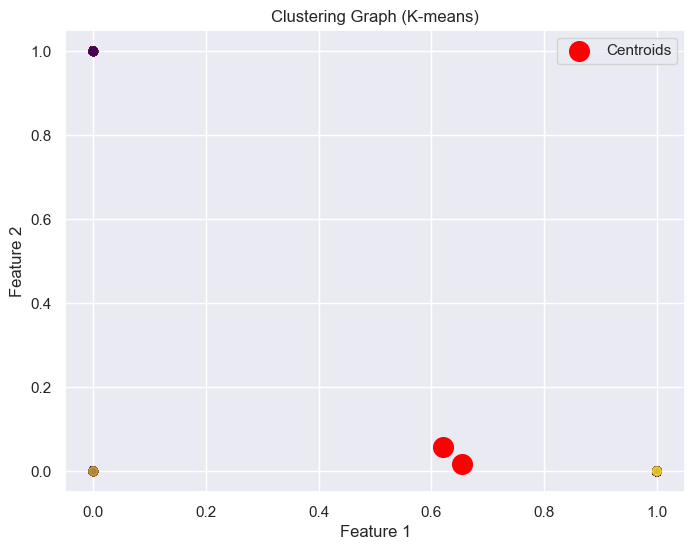

In [ ]:
%pip install tabulate
from tabulate import tabulate

from sklearn.cluster import KMeans

# Display results in a formatted way
# print(f"Accuracy: {accuracy:.4f}")
# print("Confusion Matrix:")
# print(tabulate(conf_matrix, headers=['Predicted False', 'Predicted True'], showindex=['Actual False', 'Actual True'], tablefmt='grid'))
# print("Classification Report:")
# print(classification_rep)



print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(tabulate(conf_matrix, headers=['Predicted False', 'Predicted True'], showindex=['Actual False', 'Actual True'], tablefmt='grid'))
print("Classification Report:")
print(classification_rep)

# Create clustering graph using K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_train)

# Plot clustering graph
plt.figure(figsize=(8, 6))
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='o', s=200, c='red', label='Centroids')
# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')
plt.title('Clustering Graph (K-means)')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer

# Load your dataset
df = pd.read_csv('final_data1.csv')

# Handle missing values
imputer = SimpleImputer(strategy='most_frequent')  # You can use other strategies as well
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Encode categorical variables using one-hot encoding
df_encoded = pd.get_dummies(df_imputed, drop_first=True)

# Split the data into features (X) and target (y)
X = df_encoded[[
       'Accident_Location_Rural Areas',
       'Accident_Location_Villages settlement', 
       'Main_Cause_Human Error',
       'Main_Cause_Road Environment Defect',
       'Main_Cause_Vehicle Defect',
       'Hit_Run_Yes',
       'Severity_BUDDHISTS', 'Severity_Damage Only', 'Severity_Fatal',
       'Severity_Grievous Injury', 'Severity_MEDARA',
       'Severity_Others', 'Severity_Roof',
       'Severity_Simple Injury',
       'Collision_Type_Driver-autorickshaw ', 'Collision_Type_Drowned',
       'Collision_Type_Head on', 'Collision_Type_Hit and Run',
       'Collision_Type_Hit animal', 'Collision_Type_Hit bicyclist',
       'Collision_Type_Hit fixed object', 'Collision_Type_Hit parked vehicle',
       'Collision_Type_Hit pedal cyclist', 'Collision_Type_Hit pedestrian',
       'Collision_Type_Hit puchcart', 'Collision_Type_JADAR',
       'Collision_Type_Medium',
       'Collision_Type_Others', 'Collision_Type_Overturning',
       'Collision_Type_Rear end', 'Collision_Type_Right Turn Collision',
       'Collision_Type_Run Off Road',
       'Collision_Type_Side impact or Right angle',
       'Collision_Type_Side swipe', 'Collision_Type_Skidding or Self accident',
       'Collision_Type_Vehicle to Vehicle',
       'Road_Type_City or Town Road', 'Road_Type_Expressway',
       'Road_Type_Feeder Road', 'Road_Type_Forest Road',
       'Road_Type_Major District Road', 'Road_Type_Minor District Road',
       'Road_Type_Mixed', 'Road_Type_NH', 
       'Road_Type_One way', 'Road_Type_Others', 'Road_Type_Residential Street',
       'Road_Type_Service Road', 'Road_Type_State Highway',
       'Road_Type_Sub Arterial', 'Road_Type_Two way', 'Road_Type_Village Road',
       'Surface_Condition_Dry','Surface_Condition_Flooded', 'Surface_Condition_Muddy',
       'Surface_Condition_Others',
       'Surface_Condition_Wet','Weather_Cloudy',
       'Weather_Dust Storn', 'Weather_Fine',
       'Weather_Flooding of Slipways/Rivulets', 'Weather_Fog / Mist',
       'Weather_Hail or Sleet', 'Weather_Heavy Rain', 'Weather_Light Rain',
       'Weather_Mist or Fog', 'Weather_Others',
       'Weather_Snow', 'Weather_Strong Wind', 'Weather_Very Cold',
       'Weather_Very Hot', 'Weather_Wind',
       'InjuryType_Fatal', 'InjuryType_Grievous', 'InjuryType_Minor',
       'InjuryType_Not Applicable']]
y = df_encoded['Accident_Classification_Road Accidents']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier
dt_classifier.fit(X_train, y_train)

# Predict on the testing set
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)\
    
print("Overall Model Accuracy:", accuracy)



Accuracy: 0.9309408570416716
Confusion Matrix:
[[ 2279  5342]
 [ 1678 92353]]
Classification Report:
              precision    recall  f1-score   support

       False       0.58      0.30      0.39      7621
        True       0.95      0.98      0.96     94031

    accuracy                           0.93    101652
   macro avg       0.76      0.64      0.68    101652
weighted avg       0.92      0.93      0.92    101652

Overall Model Accuracy: 0.9309408570416716


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
%pip install xgboost
import xgboost as xgb

# Load your dataset
df = pd.read_csv('final_data1.csv')

# Handle missing values
# Assuming you've already handled missing values as you did in your previous code

# Encode categorical variables using one-hot encoding
# Assuming you've already encoded categorical variables as you did in your previous code

# Split the data into features (X) and target (y)
X = df_encoded[[
       'Accident_Location_Rural Areas',
       'Accident_Location_Villages settlement', 
       'Main_Cause_Human Error',
       'Main_Cause_Road Environment Defect',
       'Main_Cause_Vehicle Defect',
       'Hit_Run_Yes',
       'Severity_BUDDHISTS', 'Severity_Damage Only', 'Severity_Fatal',
       'Severity_Grievous Injury', 'Severity_MEDARA',
       'Severity_Others', 'Severity_Roof',
       'Severity_Simple Injury',
       'Collision_Type_Driver-autorickshaw ', 'Collision_Type_Drowned',
       'Collision_Type_Head on', 'Collision_Type_Hit and Run',
       'Collision_Type_Hit animal', 'Collision_Type_Hit bicyclist',
       'Collision_Type_Hit fixed object', 'Collision_Type_Hit parked vehicle',
       'Collision_Type_Hit pedal cyclist', 'Collision_Type_Hit pedestrian',
       'Collision_Type_Hit puchcart', 'Collision_Type_JADAR',
       'Collision_Type_Medium',
       'Collision_Type_Others', 'Collision_Type_Overturning',
       'Collision_Type_Rear end', 'Collision_Type_Right Turn Collision',
       'Collision_Type_Run Off Road',
       'Collision_Type_Side impact or Right angle',
       'Collision_Type_Side swipe', 'Collision_Type_Skidding or Self accident',
       'Collision_Type_Vehicle to Vehicle',
       'Road_Type_City or Town Road', 'Road_Type_Expressway',
       'Road_Type_Feeder Road', 'Road_Type_Forest Road',
       'Road_Type_Major District Road', 'Road_Type_Minor District Road',
       'Road_Type_Mixed', 'Road_Type_NH', 
       'Road_Type_One way', 'Road_Type_Others', 'Road_Type_Residential Street',
       'Road_Type_Service Road', 'Road_Type_State Highway',
       'Road_Type_Sub Arterial', 'Road_Type_Two way', 'Road_Type_Village Road',
       'Surface_Condition_Dry','Surface_Condition_Flooded', 'Surface_Condition_Muddy',
       'Surface_Condition_Others',
       'Surface_Condition_Wet','Weather_Cloudy',
       'Weather_Dust Storn', 'Weather_Fine',
       'Weather_Flooding of Slipways/Rivulets', 'Weather_Fog / Mist',
       'Weather_Hail or Sleet', 'Weather_Heavy Rain', 'Weather_Light Rain',
       'Weather_Mist or Fog', 'Weather_Others',
       'Weather_Snow', 'Weather_Strong Wind', 'Weather_Very Cold',
       'Weather_Very Hot', 'Weather_Wind',
       'InjuryType_Fatal', 'InjuryType_Grievous', 'InjuryType_Minor',
       'InjuryType_Not Applicable']]
y = df_encoded['Accident_Classification_Road Accidents']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBoost classifier
xgb_classifier = xgb.XGBClassifier()

# Train the classifier
xgb_classifier.fit(X_train, y_train)

# Predict on the testing set
y_pred = xgb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)



   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 119.1 kB/s eta 0:13:58
   ---------------------------------------- 0.0/99.8 MB 130.7 kB/s eta 0:12:43
   ---------------------------------------- 0.0/99.8 MB 130.7 kB/s eta 0:12:43
   ---------------------------------------- 0.1/99.8 MB 163.6 kB/s eta 0:10:10
   ---------------------------------------- 0.1/99.8 MB 163.6 kB/s eta 0:10:10
   ---------------------------------------- 0.1/99.8 MB 157.1 kB/s eta 0:10:35
   ---------------------------------------- 0.1/99.8 MB 157.1 kB/s eta 0:10:35
   ------------------------

In [58]:


import lightgbm as lgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


import tensorflow as tf


# Load your dataset
df = pd.read_csv('final_data1.csv')

# Handle missing values
# Assuming you've already handled missing values as you did in your previous code

# Encode categorical variables using one-hot encoding
# Assuming you've already encoded categorical variables as you did in your previous code

# Split the data into features (X) and target (y)
X = df_encoded[[
       'Accident_Location_Rural Areas',
       'Accident_Location_Villages settlement', 
       'Main_Cause_Human Error',
       'Main_Cause_Road Environment Defect',
       'Main_Cause_Vehicle Defect',
       'Hit_Run_Yes',
       'Severity_BUDDHISTS', 'Severity_Damage Only', 'Severity_Fatal',
       'Severity_Grievous Injury', 'Severity_MEDARA',
       'Severity_Others', 'Severity_Roof',
       'Severity_Simple Injury',
       'Collision_Type_Driver-autorickshaw ', 'Collision_Type_Drowned',
       'Collision_Type_Head on', 'Collision_Type_Hit and Run',
       'Collision_Type_Hit animal', 'Collision_Type_Hit bicyclist',
       'Collision_Type_Hit fixed object', 'Collision_Type_Hit parked vehicle',
       'Collision_Type_Hit pedal cyclist', 'Collision_Type_Hit pedestrian',
       'Collision_Type_Hit puchcart', 'Collision_Type_JADAR',
       'Collision_Type_Medium',
       'Collision_Type_Others', 'Collision_Type_Overturning',
       'Collision_Type_Rear end', 'Collision_Type_Right Turn Collision',
       'Collision_Type_Run Off Road',
       'Collision_Type_Side impact or Right angle',
       'Collision_Type_Side swipe', 'Collision_Type_Skidding or Self accident',
       'Collision_Type_Vehicle to Vehicle',
       'Road_Type_City or Town Road', 'Road_Type_Expressway',
       'Road_Type_Feeder Road', 'Road_Type_Forest Road',
       'Road_Type_Major District Road', 'Road_Type_Minor District Road',
       'Road_Type_Mixed', 'Road_Type_NH', 
       'Road_Type_One way', 'Road_Type_Others', 'Road_Type_Residential Street',
       'Road_Type_Service Road', 'Road_Type_State Highway',
       'Road_Type_Sub Arterial', 'Road_Type_Two way', 'Road_Type_Village Road',
       'Surface_Condition_Dry','Surface_Condition_Flooded', 'Surface_Condition_Muddy',
       'Surface_Condition_Others',
       'Surface_Condition_Wet','Weather_Cloudy',
       'Weather_Dust Storn', 'Weather_Fine',
       'Weather_Flooding of Slipways/Rivulets', 'Weather_Fog / Mist',
       'Weather_Hail or Sleet', 'Weather_Heavy Rain', 'Weather_Light Rain',
       'Weather_Mist or Fog', 'Weather_Others',
       'Weather_Snow', 'Weather_Strong Wind', 'Weather_Very Cold',
       'Weather_Very Hot', 'Weather_Wind',
       'InjuryType_Fatal', 'InjuryType_Grievous', 'InjuryType_Minor',
       'InjuryType_Not Applicable']]
y = df_encoded['Accident_Classification_Road Accidents']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize LightGBM classifier
lgb_classifier = lgb.LGBMClassifier()

# Train the classifier
lgb_classifier.fit(X_train, y_train)

# Predict on the testing set
y_pred = lgb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 375704, number of negative: 30901
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019352 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 138
[LightGBM] [Info] Number of data points in the train set: 406605, number of used features: 69
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.924002 -> initscore=2.498013
[LightGBM] [Info] Start training from score 2.498013
Accuracy: 0.9291799472710818
